# Desafío

Vamos a practicar lo que aprendimos a partir del DataFrame df que generamos en el ejercicio de Manos a la Obra anterior?

Has recibido una nueva demanda de Zoop para generar 2 nuevos visuales, uno relacionado con el perfil de las ventas y el otro con el perfil de los clientes de una región específica. Vamos a observar las dos situaciones y construir, con la ayuda de ChatGPT, los dos gráficos solicitados:

Desafío 1:

Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre el facturación de las ventas por región. Recuerda que aquí la facturación se calcula multiplicando el valor unitario por la cantidad comprada y sumando el costo de envío.

Desafío 2:

Zoop quiere realizar una campaña en los estados de México y Puebla, por lo que necesita conocer el perfil de su público según el sexo biológico. Construye y ejecuta un prompt en ChatGPT para generar, a partir de nuestra base de datos, un visual que muestre la composición del público por sexo biológico en los estados de México y Puebla. Recuerda pedir que agrupe o apile los datos para la presentación.


# Datos anteriores

In [27]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"
url_zoop_pay = "https://gist.githubusercontent.com/ahcamachod/ce728231a836a973c0df94a9f03ed871/raw/8db6da43d7cd94fcab937208067d0fceb521b78c/zoop_pay.csv"

clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
ventas["fecha"] = pd.to_datetime(ventas["fecha"], format="%Y-%m-%d")
ventas["horario"] = pd.to_datetime(ventas["horario"], format="%H:%M").dt.time

df = pd.merge(ventas, clientes, on="ID_compra", how="inner")
# Reorganizar las columnas en el orden deseado
columnas_ordenadas = [
    "ID_compra",
    "fecha",
    "horario",
    "categoria",
    "precio_unitario",
    "cantidad",
    "envio",
    "metodo_pago",
    "ID_cliente",
    "edad",
    "sexo_biologico",
    "ciudad",
    "estado",
    "region",
    "cashback",
    "nota",
]

# Aplicar el orden de las columnas
df = df[columnas_ordenadas]

clientes = pd.read_csv(url_clientes)
ventas = pd.read_csv(url_ventas)
zoop_pay = pd.read_csv(url_zoop_pay)

# 2. Unir ventas y clientes por 'ID_compra'
df = pd.merge(ventas, clientes, on="ID_compra", how="inner")

# 3. Unir con la base zoop_pay por 'ID_cliente'
df = pd.merge(df, zoop_pay, on="ID_cliente", how="left")

# 4. Renombrar columnas para estandarizar nombres
df = df.rename(
    columns={
        "fecha de la compra": "fecha",
        "hora de la compra": "horario",
        "categoría del producto": "categoria",
        "precio unitario del producto": "precio_unitario",
        "cantidad vendida": "cantidad",
        "método de pago": "metodo_pago",
        "sexo biológico": "sexo_biologico",
        "programa de cashback": "cashback",
    }
)

# 5. Asegurar tipo datetime para la columna 'fecha'
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")

# 6. Reordenar las columnas en el orden solicitado
columnas_ordenadas = [
    "ID_compra",
    "fecha",
    "horario",
    "categoria",
    "precio_unitario",
    "cantidad",
    "envio",
    "metodo_pago",
    "ID_cliente",
    "edad",
    "sexo_biologico",
    "ciudad",
    "estado",
    "region",
    "cashback",
    "zoop_pay",
]

df = df[columnas_ordenadas]
df.head()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,ID_cliente,edad,sexo_biologico,ciudad,estado,region,cashback,zoop_pay
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal,6149,30,Masculino,Hermosillo,Sonora,Noroeste,Sí,No
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia,9491,36,Masculino,Ciudad de México,Ciudad de México,Centro,Sí,Sí
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito,5288,39,Femenino,Aguascalientes,Aguascalientes,Centro-Norte,No,No
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia,9679,35,Masculino,Veracruz,Veracruz,Golfo,Sí,Sí
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia,1380,50,Masculino,Ciudad de México,Ciudad de México,Centro,No,No


# Desafío 1:
## Prompt

Se ha generado una nueva petición: 
A partir del DataFrame llamado df generar una visualización que muestre la facturación de ventas por región. Es importante saber que la facturación se obtiene multiplicando el valor unitario por la cantidad comprada y se le suma el costo de envío.

## Respuesta

Aquí tienes un bloque de código en Python que

1. calcula la **facturación** por registro (`precio_unitario * cantidad + envio`),
2. agrega la facturación total por **región**, y
3. presenta el resultado en un **gráfico de barras horizontales** para que las etiquetas se lean con claridad:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular la facturación por fila
df['facturacion'] = df['precio_unitario'] * df['cantidad'] + df['envio']

# 2. Agrupar por región y sumar la facturación
ventas_region = (
    df.groupby('region', as_index=False)['facturacion']
      .sum()
      .sort_values('facturacion', ascending=True)  # orden ascendente para barras horizontales
)

# 3. Visualización: barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_region,
            x='facturacion',
            y='region',
            palette='viridis')

plt.title('Facturación total por región')
plt.xlabel('Facturación')
plt.ylabel('Región')
plt.tight_layout()
plt.show()
```

**Qué hace cada paso?**

| Paso | Acción                                         | Resultado                                                   |
| ---- | ---------------------------------------------- | ----------------------------------------------------------- |
| 1    | Crea la columna `facturacion` para cada compra | Integra precio, cantidad y envío                            |
| 2    | Agrega (`groupby`) la facturación por `region` | Produce una tabla con la facturación total de cada región   |
| 3    | Dibuja un barplot horizontal con Seaborn       | Muestra, de forma ordenada, qué regiones generan más ventas |

Con esto obtendrás una visualización clara de qué regiones impulsan los ingresos de Zoop. Si deseas ordenar las barras de mayor a menor, cambia `ascending=True` por `False`, o bien añade etiquetas de valores sobre cada barra usando `plt.bar_label`.


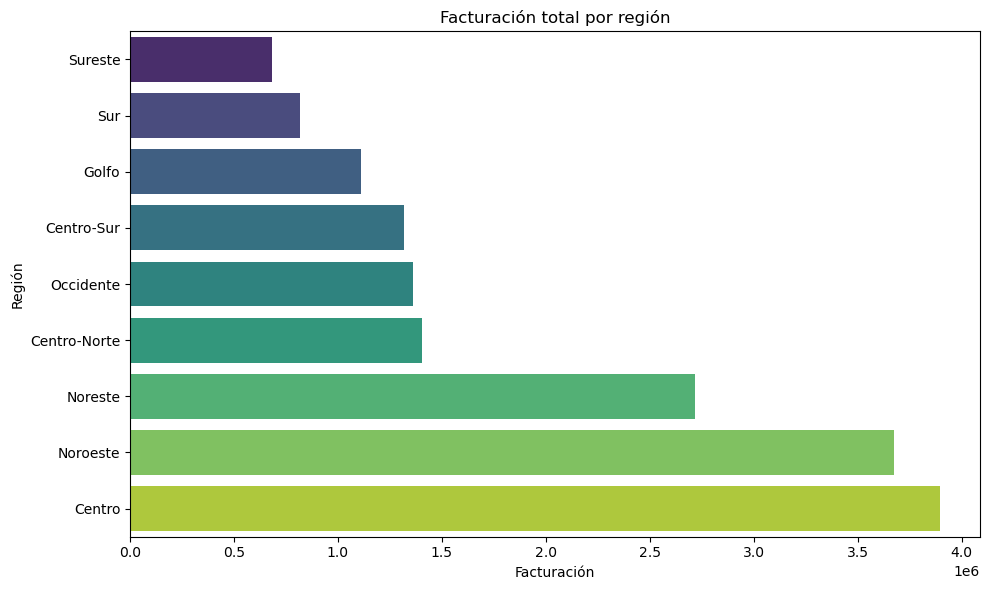

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular la facturación por fila
df["facturacion"] = df["precio_unitario"] * df["cantidad"] + df["envio"]

# 2. Agrupar por región y sumar la facturación
ventas_region = (
    df.groupby("region", as_index=False)["facturacion"]
    .sum()
    .sort_values(
        "facturacion", ascending=True
    )  # orden ascendente para barras horizontales
)

# 3. Visualización: barras horizontales
plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_region, x="facturacion", y="region", palette="viridis")

plt.title("Facturación total por región")
plt.xlabel("Facturación")
plt.ylabel("Región")
plt.tight_layout()
plt.show()

# Desafío 2:

## Prompt
En el DataFrame llamado `df` se profundizará en los datos de los estados México y Puebla para conocer al público de acuerdo a su sexo biológico.
Genera una visualización en un gráfico de barras agrupado para comprender la composición del público según su sexo biológico (columna `sexo_biologico`) para los estados México y Puebla (columna `estado`).
Utiliza la biblioteca de visualización Plotly para darle un toque adicional de interactividad.

## Respuesta

Perfecto. Vamos a crear un **gráfico de barras agrupado con Plotly** para visualizar la composición del público según su `sexo_biologico`, filtrando solo los estados **México** y **Puebla**.

### ✅ Pasos que seguimos:

1. Filtrar los datos para los estados “México” y “Puebla”.
2. Agrupar por `estado` y `sexo_biologico`, contando cuántos registros hay por grupo.
3. Construir un gráfico de barras agrupado usando `plotly.express`.

---

### 🧠 Código en Python:

```python
import pandas as pd
import plotly.express as px

# 1. Filtrar los estados de interés
df_filtrado = df[df['estado'].isin(['Estado de México', 'Puebla'])]

# 2. Agrupar por estado y sexo biológico, contar cantidad
publico_estado_sexo = (
    df_filtrado.groupby(['estado', 'sexo_biologico'])
               .size()
               .reset_index(name='cantidad')
)

# 3. Crear gráfico de barras agrupadas con Plotly
fig = px.bar(
    publico_estado_sexo,
    x='estado',
    y='cantidad',
    color='sexo_biologico',
    barmode='group',
    title='Composición del público por sexo biológico en los estados de Estado de México y Puebla',
    labels={'cantidad': 'Cantidad de clientes', 'sexo_biologico': 'Sexo biológico'}
)

# Mostrar gráfico interactivo
fig.show()
```

---

### 📊 ¿Qué verás?

* Dos grupos de barras: uno para **Estado de México**, otro para **Puebla**.
* Dentro de cada grupo, las barras están separadas por **sexo biológico**.
* Puedes pasar el cursor sobre las barras para ver los valores exactos gracias a la interactividad de Plotly.

¿Quieres cambiar colores, agregar porcentajes o exportar el gráfico a HTML o imagen? Te puedo ayudar con eso también.


In [31]:
import plotly.express as px

# 1. Filtrar los estados de interés
df_filtrado = df[df["estado"].isin(["Estado de México", "Puebla"])]

# 2. Agrupar por estado y sexo biológico, contar cantidad
publico_estado_sexo = (
    df_filtrado.groupby(["estado", "sexo_biologico"])
    .size()
    .reset_index(name="cantidad")
)

# 3. Crear gráfico de barras agrupadas con Plotly
fig = px.bar(
    publico_estado_sexo,
    x="estado",
    y="cantidad",
    color="sexo_biologico",
    barmode="group",
    title="Composición del público por sexo biológico en los estados de México y Puebla",
    labels={"cantidad": "Cantidad de clientes", "sexo_biologico": "Sexo biológico"},
)

# Mostrar gráfico interactivo
fig.show()

In [30]:
df.query('estado == "Estado de México"')

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,ID_cliente,edad,sexo_biologico,ciudad,estado,region,cashback,zoop_pay,facturacion
16,18,2023-01-04,00:09,Alimentos y bebidas,61.0,5,0.0,Tarjeta de Crédito,6492,18,Masculino,Amecameca,Estado de México,Centro,No,No,305.0
24,28,2023-01-05,14:10,Alimentos y bebidas,56.9,5,0.0,Tarjeta de Crédito,1955,51,Masculino,Atizapán de Zaragoza,Estado de México,Centro,No,No,284.5
25,25,2023-01-05,17:42,Casa y aseo,24.9,4,0.0,Tarjeta de Crédito,2411,45,Masculino,Naucalpan de Juárez,Estado de México,Centro,No,No,99.6
26,21,2023-01-05,00:58,Herramientas y construcción,143.9,3,0.0,Tarjeta de Crédito,6284,40,Femenino,Chalco,Estado de México,Centro,No,No,431.7
30,36,2023-01-06,17:49,Electrodomésticos,740.9,4,0.0,Tarjeta de Crédito,4977,33,Femenino,Texcoco,Estado de México,Centro,Sí,No,2963.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,6130,2023-12-31,17:16,Herramientas y construcción,109.9,4,0.0,Transferencia,7000,26,Femenino,Atizapán de Zaragoza,Estado de México,Centro,No,No,439.6
6144,6136,2023-12-31,22:01,Casa y aseo,33.9,1,0.0,Tarjeta de Crédito,8006,36,Femenino,Toluca,Estado de México,Centro,Sí,Sí,33.9
6145,6153,2023-12-31,23:44,Electrónicos,6376.9,3,0.0,Transferencia,2719,37,Masculino,Ecatepec de Morelos,Estado de México,Centro,Sí,Sí,19130.7
6155,6164,2023-12-31,22:01,Belleza e higiene,199.9,5,0.0,Tarjeta de Crédito,9710,41,Femenino,Amecameca,Estado de México,Centro,No,No,999.5
